# Data Understanding and Data Visualization


#### Objectives


The objectives to be achieved with this notebook are as follows:

-   Explore the data to find out its characteristics or features useful for creating our Recommender System.
-   Prepare and convert the data to a more appropriate format.
-   Visualise the data in order to understand their relationships.


#### Table of contents
           
1. [Data Extraction](#de)
2. [Import Libraries](#il)
3. [Board Games Data Understanding](#bgdu)
      - [Load Data](#bgld)
      - [Data Cleaning](#bgdc)
4. [Users Data Understanding](#udu)
      - [Load Data](#uld)
      - [Data Wrangling](#udw)
      - [Data Cleaning](#udc)
5. [Data Engineering](#den) 
6. [Data Visualization](#dv)       

<a id="de"></a>

## 1. Data Extraction

For this analysis we will use two datasets. A dataset containing board games and their main characteristics. And a dataset of users whose characteristics are related to the games that each user owns and their own evaluations of those games.

The data pertaining to the games dataset have been obtained from the Board Game Geek [BGG](https://boardgamegeek.com/). The download date of the dataset is 26/03/2021.


The data belonging to the user dataset has been acquired from WebScraping on a page associated with the BGG. After this process, different files were obtained, one for each user, the content of which corresponds to the data for that user only.



<a id="il"></a>

## 2. Import libraries

In [2]:
import os
import glob
import pandas as pd
import numpy as np
#import matplotlib
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#import matplotlib.style as style 
import seaborn as sns
#import shutil
pd.options.display.max_columns = None

<a id="bgdu"></a>

## 3. Board Games Data Understanding

<a id="bgld"></a>

- ### Load Data

In [3]:
path='/Users/postigo/Google Drive/BoardGamesData' #Actualizar tras crear Prepair the Env
file = os.path.join(path, "bgg_GameItem.csv") 

In [4]:
dfbg=pd.read_csv(file, low_memory=False)
dfbg.head()

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
0,1,Die Macher,1986.0,5497,1,"12517,4959","133,2,2726,15108,39249,11652,5382,8147",3.0,5.0,4.0,5.0,5.0,5.0,14.0,14.031250,240.0,240.0,"1021,1026,1001","2916,2080,2012,2072,2040,2020",0,0,NaN,"10643,34116,91",NaN,NaN,286.0,5224,7.62849,1.57747,7.13389,4.3245,1.166667,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Dragonmaster,1981.0,5497,8384,12424,"64,20",3.0,4.0,3.0,4.0,3.0,4.0,12.0,NaN,30.0,30.0,"1002,1010",2009,0,0,NaN,7005,2174,NaN,3718.0,553,6.63055,1.44269,5.79353,1.9630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Samurai,1998.0,5497,2,11883,"17,133,267,29,7340,7335,41,2973,4617,1391,8291...",2.0,4.0,2.0,4.0,3.0,3.0,10.0,9.793103,30.0,60.0,"1009,1035","2080,2040,2026,2846,2004,2002",0,0,NaN,"10634,60111,42,28732",NaN,NaN,209.0,14736,7.45062,1.18523,7.24469,2.4885,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Tal der Könige,1992.0,NaN,8008,2277,37,2.0,4.0,2.0,4.0,2.0,4.0,12.0,NaN,60.0,60.0,1050,"2001,2080,2012,2004",0,0,NaN,"64229,6471,11505",NaN,NaN,4951.0,339,6.59888,1.23291,5.69032,2.6667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Acquire,1964.0,5497,4,"12658,18317","92,5,4871,3082,858,2962,5392,4668,38,4622,7107",2.0,6.0,3.0,6.0,4.0,4.0,12.0,11.735294,90.0,90.0,"1021,1086","2040,2910,2900,2911,2940,2005,2002,2874",0,0,NaN,4891,NaN,NaN,276.0,18189,7.33994,1.33515,7.15158,2.5041,1.090278,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('Number rows and columns', dfbg.shape)

Number rows and columns (100052, 38)


In [5]:
dfbg.columns

Index(['bgg_id', 'name', 'year', 'game_type', 'designer', 'artist',
       'publisher', 'min_players', 'max_players', 'min_players_rec',
       'max_players_rec', 'min_players_best', 'max_players_best', 'min_age',
       'min_age_rec', 'min_time', 'max_time', 'category', 'mechanic',
       'cooperative', 'compilation', 'compilation_of', 'family',
       'implementation', 'integration', 'rank', 'num_votes', 'avg_rating',
       'stddev_rating', 'bayes_rating', 'complexity', 'language_dependency',
       'bga_id', 'dbpedia_id', 'luding_id', 'spielen_id', 'wikidata_id',
       'wikipedia_id'],
      dtype='object')

In [6]:
dfbg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100052 entries, 0 to 100051
Data columns (total 38 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   bgg_id               100052 non-null  int64  
 1   name                 100052 non-null  object 
 2   year                 90954 non-null   float64
 3   game_type            21698 non-null   object 
 4   designer             85454 non-null   object 
 5   artist               40876 non-null   object 
 6   publisher            100038 non-null  object 
 7   min_players          98213 non-null   float64
 8   max_players          94686 non-null   float64
 9   min_players_rec      98213 non-null   float64
 10  max_players_rec      94686 non-null   float64
 11  min_players_best     98213 non-null   float64
 12  max_players_best     94686 non-null   float64
 13  min_age              77999 non-null   float64
 14  min_age_rec          906 non-null     float64
 15  min_time         

<a id="bgdc"></a>

- ### Data Cleaning

#### Quick overview of values

In [7]:
dfbg.describe(include='all')

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
count,100052.000000,100052,90954.000000,21698,85454,40876,100038,98213.000000,94686.000000,98213.000000,94686.000000,98213.000000,94686.000000,77999.000000,906.000000,79186.000000,7.918600e+04,98007,84576,100052.000000,100052.000000,697,58556,4651,3232,20323.000000,100052.000000,73855.000000,100052.000000,20624.000000,43412.000000,785.000000,0.0,0.0,0.0,0.0,0.0,0.0
unique,NaN,95592,NaN,41,28454,19215,31269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18219,17460,NaN,NaN,685,20233,3667,2762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Grand Prix,NaN,4664,3,3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1009,2035,NaN,NaN,184011,"22184,8374",258,"1421,3969,7113",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,12,NaN,7435,18715,3769,5424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4457,7168,NaN,NaN,3,1949,35,60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,128083.905029,NaN,1999.456593,NaN,NaN,NaN,NaN,2.037154,6.617219,2.042347,6.598325,2.074135,6.575006,9.420659,9.885323,53.089839,4.962246e+02,NaN,NaN,0.049005,0.006966,NaN,NaN,NaN,NaN,10167.401023,175.765772,6.005236,0.864632,5.688211,1.926472,2.101514,NaN,NaN,NaN,NaN,NaN,NaN
std,104699.488217,NaN,71.932626,NaN,NaN,NaN,NaN,0.813903,52.624641,0.819634,52.613976,0.857828,52.614735,7.919847,2.824056,650.529968,1.069209e+05,NaN,NaN,0.215879,0.083174,NaN,NaN,NaN,NaN,5872.224587,1619.001716,1.618081,0.860463,0.368113,0.845396,1.195129,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,-3500.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.025641,1.000000,1.000000e+00,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,3.550380,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,28742.750000,NaN,1995.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,2.000000,4.000000,2.000000,3.000000,7.000000,7.989583,15.000000,2.000000e+01,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,5081.500000,0.000000,5.000000,0.000000,5.510652,1.000000,1.012195,NaN,NaN,NaN,NaN,NaN,NaN
50%,113983.000000,NaN,2009.000000,NaN,NaN,NaN,NaN,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,10.000000,10.000000,30.000000,3.000000e+01,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,10160.000000,3.000000,6.048920,0.942809,5.548510,2.000000,1.733333,NaN,NaN,NaN,NaN,NaN,NaN
75%,217234.250000,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,6.000000,2.000000,6.000000,2.000000,6.000000,12.000000,11.957880,60.000000,6.000000e+01,NaN,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,15261.500000,18.000000,7.000000,1.505795,5.685128,2.500000,3.052632,NaN,NaN,NaN,NaN,NaN,NaN


#### Check for duplicate values

In [8]:
dfbg['bgg_id'].value_counts()

163050    1
36219     1
101787    1
230810    1
312591    1
         ..
256616    1
98917     1
268926    1
282246    1
2047      1
Name: bgg_id, Length: 100052, dtype: int64

In [9]:
dfbg['bgg_id'].duplicated().sum() 

0

In [10]:
dfbg['name'].duplicated().sum()

4460

In [11]:
dfbg[dfbg['name'].duplicated()]

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
594,680,Dune,1984.0,5496,7064,NaN,"1772,28",2.0,4.0,2.0,4.0,2.0,4.0,10.0,NaN,90.0,90.0,"1064,1093,1016","2014,2072,2685,2035,2686",0,0,NaN,5838,NaN,NaN,13180.0,336,5.74836,1.79391,5.52367,2.1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
748,859,Illuminati,1982.0,"5496,5497",22,"3737,15323",19,2.0,6.0,3.0,6.0,4.0,5.0,12.0,NaN,60.0,120.0,"1002,1093,1001,1016",2040,0,0,NaN,"65191,5828,27646,41798",NaN,NaN,3037.0,2650,6.19733,1.64462,5.88332,2.4842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1078,1268,What's That on My Head?,1963.0,NaN,221,NaN,"74,1064,163",3.0,6.0,3.0,6.0,3.0,6.0,NaN,NaN,60.0,60.0,1039,NaN,0,0,NaN,"65478,11111",NaN,NaN,13415.0,39,6.37179,1.40839,5.52195,2.2500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1397,1638,Archimedes,1981.0,4666,7172,NaN,"1997,253,8896,28133,370",2.0,4.0,2.0,4.0,2.0,4.0,8.0,NaN,30.0,30.0,1009,NaN,0,0,NaN,NaN,NaN,NaN,18481.0,42,4.83333,1.26729,5.48240,2.1667,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1453,1704,Attacke,1977.0,4664,3,3,38,2.0,4.0,2.0,4.0,2.0,4.0,8.0,NaN,45.0,45.0,"1023,1019",NaN,0,0,NaN,NaN,NaN,NaN,NaN,1,6.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99869,332010,Hunch,NaN,NaN,134357,NaN,48103,2.0,8.0,2.0,8.0,2.0,8.0,10.0,NaN,NaN,NaN,"1002,1041,1094",NaN,0,0,NaN,22783,NaN,NaN,NaN,0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99903,332168,Minimize,2021.0,NaN,NaN,NaN,45615,3.0,8.0,3.0,8.0,3.0,8.0,8.0,NaN,5.0,25.0,"1009,1002,1098,1030","3004,2889,2685,2661,2004,2686",0,0,NaN,"22184,8374",NaN,NaN,NaN,2,10.00000,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99914,332198,Arma,2021.0,NaN,134451,NaN,48124,2.0,4.0,2.0,4.0,2.0,4.0,6.0,NaN,5.0,45.0,"1050,1031",2860,0,0,NaN,"22184,8374",NaN,NaN,NaN,0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99977,332493,Manhattan,2021.0,NaN,2321,NaN,7854,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,1009,NaN,0,0,NaN,26432,NaN,NaN,NaN,0,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
dfbg[dfbg['name']=='Dune']

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
112,121,Dune,1979.0,"5496,5497","34,35,36","12261,11801,12433,667,12434,12432,1158","5,41,1391",2.0,6.0,4.0,6.0,6.0,6.0,12.0,13.916667,60.0,180.0,"1023,1046,1026,1093,1001,1016","2916,2080,2046,2012,2040,2961,2019,2015",0,0,NaN,"7973,5838,5679,5615,13265",NaN,NaN,307.0,5488,7.61988,1.68986,7.09523,3.4419,2.975,NaN,NaN,NaN,NaN,NaN,NaN
594,680,Dune,1984.0,5496,7064,NaN,"1772,28",2.0,4.0,2.0,4.0,2.0,4.0,10.0,NaN,90.0,90.0,"1064,1093,1016","2014,2072,2685,2035,2686",0,0,NaN,5838,NaN,NaN,13180.0,336,5.74836,1.79391,5.52367,2.1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31305,36022,Dune,2002.0,NaN,810,NaN,873,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,"1002,1093,1120,1016","2041,2072",0,0,NaN,5838,NaN,NaN,NaN,6,8.25000,1.57454,NaN,3.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88477,283355,Dune,2019.0,"5496,5497","34,35,36",53050,11420,2.0,6.0,5.0,6.0,6.0,6.0,14.0,NaN,120.0,120.0,"1023,1046,1026,1093,1001,1016,1019","2916,2080,2046,2012,2913,2864,2961,3006,2686,2015",0,0,NaN,"5838,13265",121,NaN,284.0,3137,8.17603,1.59421,7.13865,3.8922,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dfbg[dfbg['name']=='Arma']

,bgg_id,name,year,game_type,designer,artist,publisher,min_players,max_players,min_players_rec,max_players_rec,min_players_best,max_players_best,min_age,min_age_rec,min_time,max_time,category,mechanic,cooperative,compilation,compilation_of,family,implementation,integration,rank,num_votes,avg_rating,stddev_rating,bayes_rating,complexity,language_dependency,bga_id,dbpedia_id,luding_id,spielen_id,wikidata_id,wikipedia_id
72643,202870,Arma,2016.0,NaN,53801,"65692,92973,92971,92972,92974,93080,92975",19114,3.0,5.0,3.0,5.0,3.0,5.0,10.0,NaN,30.0,40.0,"1002,1082",2040,0,0,NaN,NaN,NaN,NaN,NaN,7,5.42857,0.903508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99914,332198,Arma,2021.0,NaN,134451,NaN,48124,2.0,4.0,2.0,4.0,2.0,4.0,6.0,NaN,5.0,45.0,"1050,1031",2860,0,0,NaN,"22184,8374",NaN,NaN,NaN,0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


When checking one by one the names that appear duplicated we see that only the name is repeated, the rest of attributes are different. These games are reeditions of the original game whose author, categories or mechanics have changed with each edition, so they are considered as different games when placing the id of the game.

#### Check for null values

In [14]:
dfbg.isnull().sum()

bgg_id                      0
name                        0
year                     9098
game_type               78354
designer                14598
artist                  59176
publisher                  14
min_players              1839
max_players              5366
min_players_rec          1839
max_players_rec          5366
min_players_best         1839
max_players_best         5366
min_age                 22053
min_age_rec             99146
min_time                20866
max_time                20866
category                 2045
mechanic                15476
cooperative                 0
compilation                 0
compilation_of          99355
family                  41496
implementation          95401
integration             96820
rank                    79729
num_votes                   0
avg_rating              26197
stddev_rating               0
bayes_rating            79428
complexity              56640
language_dependency     99267
bga_id                 100052
dbpedia_id

#### Discard columns with all null values and columns not interesting for this analysis

In [15]:
cols= ['bgg_id', 'name', 'year','designer','min_players', 'max_players','min_time', 'max_time', 'category','cooperative']
dfbg2= pd.read_csv(file,usecols= cols, low_memory=False)
dfbg2.head()

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
0,1,Die Macher,1986.0,1,3.0,5.0,240.0,240.0,"1021,1026,1001",0
1,2,Dragonmaster,1981.0,8384,3.0,4.0,30.0,30.0,"1002,1010",0
2,3,Samurai,1998.0,2,2.0,4.0,30.0,60.0,"1009,1035",0
3,4,Tal der Könige,1992.0,8008,2.0,4.0,60.0,60.0,1050,0
4,5,Acquire,1964.0,4,2.0,6.0,90.0,90.0,"1021,1086",0


In [16]:
dfbg2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100052 entries, 0 to 100051
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   bgg_id       100052 non-null  int64  
 1   name         100052 non-null  object 
 2   year         90954 non-null   float64
 3   designer     85454 non-null   object 
 4   min_players  98213 non-null   float64
 5   max_players  94686 non-null   float64
 6   min_time     79186 non-null   float64
 7   max_time     79186 non-null   float64
 8   category     98007 non-null   object 
 9   cooperative  100052 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.6+ MB


#### Order the dataset according to the year column

In [17]:
year = dfbg2.sort_values('year', ascending=False)
year.head(50)

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
86172,271081,Dominus,2023.0,101308,1.0,4.0,15.0,30.0,1035,0
99507,330152,Nature,2023.0,3245,2.0,5.0,30.0,60.0,"1089,1002,1094,1084,1036",0
92040,299106,Fractal: Beyond the Void,2022.0,"123810,123809,116798,116799",1.0,4.0,60.0,180.0,"1022,1015,1047,1001,1016,1113,1019",0
97579,322619,Scarface,2022.0,88597,2.0,2.0,25.0,25.0,"1094,1033",0
99592,330579,Raising Chicago,2022.0,79529,2.0,4.0,75.0,120.0,"1029,1021,1086",0
99254,329226,Circadians: Chaos Order,2022.0,"103821,133311",2.0,5.0,120.0,240.0,1016,0
99433,329862,Tiny Turbo Cars,2022.0,"91211,114249,114247,114248,114090",2.0,4.0,30.0,45.0,"1028,1031",0
99734,331317,Coalitions,2022.0,129507,2.0,6.0,60.0,240.0,"1051,1026,1001,1019",0
99735,331318,Citytrip Junior,2022.0,132082,1.0,6.0,15.0,25.0,1020,0
98995,328272,Bliss,2022.0,113983,1.0,5.0,45.0,90.0,1002,0


In [18]:
year['year'][year['year'].isin([2021, 2022])].count()

1828

In [19]:
# Review the games released in 2020, which is the last year completed

year['year'][year['year']==2020].count()

4463

In [20]:
# Check for negative values

year['year'][year['year']<0]

18707    -100.0
4715     -200.0
12077    -350.0
35092    -600.0
19670    -700.0
10438   -1300.0
22356   -1400.0
67951   -1400.0
3359    -1400.0
17402   -1400.0
24476   -1800.0
2495    -2000.0
32787   -2000.0
168     -2200.0
34413   -2500.0
1366    -2600.0
10283   -3000.0
4812    -3000.0
3591    -3000.0
2057    -3000.0
20172   -3000.0
2059    -3500.0
Name: year, dtype: float64

In [21]:
year['year'][year['year']<0].count()

22

In [22]:
year.tail(50)

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
99492,330069,Tribal Souls,NaN,133606,1.0,8.0,NaN,NaN,NaN,0
99525,330228,Монополия: Курск,NaN,NaN,2.0,5.0,45.0,45.0,"1021,1026",0
99528,330233,Sekai no Hate made Itte Q!,NaN,NaN,2.0,6.0,NaN,NaN,"1064,1027",0
99569,330506,Black Stories Junior: Stadt-Land-Ferien,NaN,NaN,2.0,50.0,2.0,222.0,"1041,1097",0
99573,330528,Конни Състезания Фюри,NaN,133843,2.0,5.0,NaN,NaN,"1089,1017,1064,1031",0
99577,330535,Diagonale,NaN,NaN,1.0,2.0,NaN,NaN,"1009,1031",0
99580,330539,Cutthroat Cove: Pieces of Eight,NaN,NaN,2.0,4.0,10.0,15.0,"1002,1090",0
99630,330746,Wizards of Mickey: First Age,NaN,"10066,6838,10052",2.0,2.0,15.0,15.0,"1023,1002,1044,1116,1010,1079,1064",0
99640,330788,Off the Line,NaN,2961,2.0,2.0,60.0,120.0,"1002,1046,1019,1049",0
99647,330821,Destination Great Britain,NaN,4670,2.0,6.0,60.0,60.0,1097,0


In [23]:
year['year'].isnull().sum()

9098

In 1900 the board game industry began to evolve, and in 1970 began to create games that tried to create different and more complex gaming experiences, as is the case of **Dungeons and Dragons**, or the evolution of board games, such as **The Hare and the Tortoise** by *David Parlett*, which is the first board game to win a **Spiel Des Jahres** (Game of the Year) in 1979, one of the most prestigious awards worldwide to this day. The mere fact that an award for board game of the year began to exist already gives us to understand that at that time the industry could define its criteria of what represents a board game as such.  


An important and notable difference between traditional and modern board games is the inclusion of game themes, which are not necessarily based on reality, but on fantasy and fiction, being the case of multiple examples such as **Catan**, **Carcassonne**, **Dominion** or **The Resistance**.  


**Since the objective of this TFM is the creation of a modern board game recommender. We consider 1970 as the year in which modern board games began to be created and therefore, all our analysis will focus on games created after that date.**




In [24]:
year['year'][year['year']<1970].count()

6307

In [25]:
year['year'][year['year']>=1970].count()

84647

In [26]:
year[year['year']>=1970].isnull().sum()

bgg_id             0
name               0
year               0
designer       10083
min_players      876
max_players     3332
min_time       13914
max_time       13914
category        1586
cooperative        0
dtype: int64

In [27]:
dfbg3=dfbg2[dfbg2['year']>=1970]
dfbg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84647 entries, 0 to 100051
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bgg_id       84647 non-null  int64  
 1   name         84647 non-null  object 
 2   year         84647 non-null  float64
 3   designer     74564 non-null  object 
 4   min_players  83771 non-null  float64
 5   max_players  81315 non-null  float64
 6   min_time     70733 non-null  float64
 7   max_time     70733 non-null  float64
 8   category     83061 non-null  object 
 9   cooperative  84647 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 7.1+ MB


In [28]:
# Change the data types
bg=dfbg3.copy()
bg['year']=bg.loc[:, 'year'].apply(np.int)
bg

,bgg_id,name,year,designer,min_players,max_players,min_time,max_time,category,cooperative
0,1,Die Macher,1986,1,3.0,5.0,240.0,240.0,"1021,1026,1001",0
1,2,Dragonmaster,1981,8384,3.0,4.0,30.0,30.0,"1002,1010",0
2,3,Samurai,1998,2,2.0,4.0,30.0,60.0,"1009,1035",0
3,4,Tal der Könige,1992,8008,2.0,4.0,60.0,60.0,1050,0
5,6,Mare Mediterraneum,1989,5,2.0,6.0,240.0,240.0,"1015,1008",0
...,...,...,...,...,...,...,...,...,...,...
100047,332986,Monkey Spank!,2017,134741,2.0,6.0,5.0,15.0,"1002,1079,1118,1030,1037",0
100048,333002,Revolution: The Game of 1776,1975,3,2.0,6.0,NaN,NaN,1075,0
100049,333021,Piratz,2021,961,2.0,4.0,15.0,15.0,1002,0
100050,333116,Zombie Princess and the Enchanted Maze,2021,NaN,2.0,5.0,45.0,60.0,"1010,1059,2481",0


In [29]:
bg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84647 entries, 0 to 100051
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bgg_id       84647 non-null  int64  
 1   name         84647 non-null  object 
 2   year         84647 non-null  int64  
 3   designer     74564 non-null  object 
 4   min_players  83771 non-null  float64
 5   max_players  81315 non-null  float64
 6   min_time     70733 non-null  float64
 7   max_time     70733 non-null  float64
 8   category     83061 non-null  object 
 9   cooperative  84647 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 7.1+ MB


#### Display of games after 1970

In [30]:
year_num=list(bg['year'])
year_count={i:year_num.count(i) for i in year_num}
print(year_count)

{1986: 876, 1981: 612, 1998: 1068, 1992: 869, 1989: 824, 1978: 513, 1993: 797, 1997: 901, 1999: 1094, 1995: 937, 1977: 549, 1996: 870, 1994: 852, 1991: 837, 1988: 772, 1979: 554, 1984: 751, 1987: 872, 1975: 580, 1982: 570, 1980: 603, 1990: 886, 1974: 420, 1972: 348, 1983: 706, 1985: 827, 1973: 408, 2000: 1265, 2002: 1608, 1971: 260, 1976: 506, 2001: 1376, 1970: 356, 2003: 1713, 2011: 2978, 2012: 3052, 2004: 2039, 2005: 2429, 2009: 2784, 2007: 2510, 2010: 2832, 2006: 2384, 2008: 2509, 2014: 3540, 2015: 3796, 2013: 3087, 2016: 4062, 2017: 4192, 2018: 4436, 2019: 4744, 2021: 1724, 2020: 4463, 2022: 104, 2023: 2}


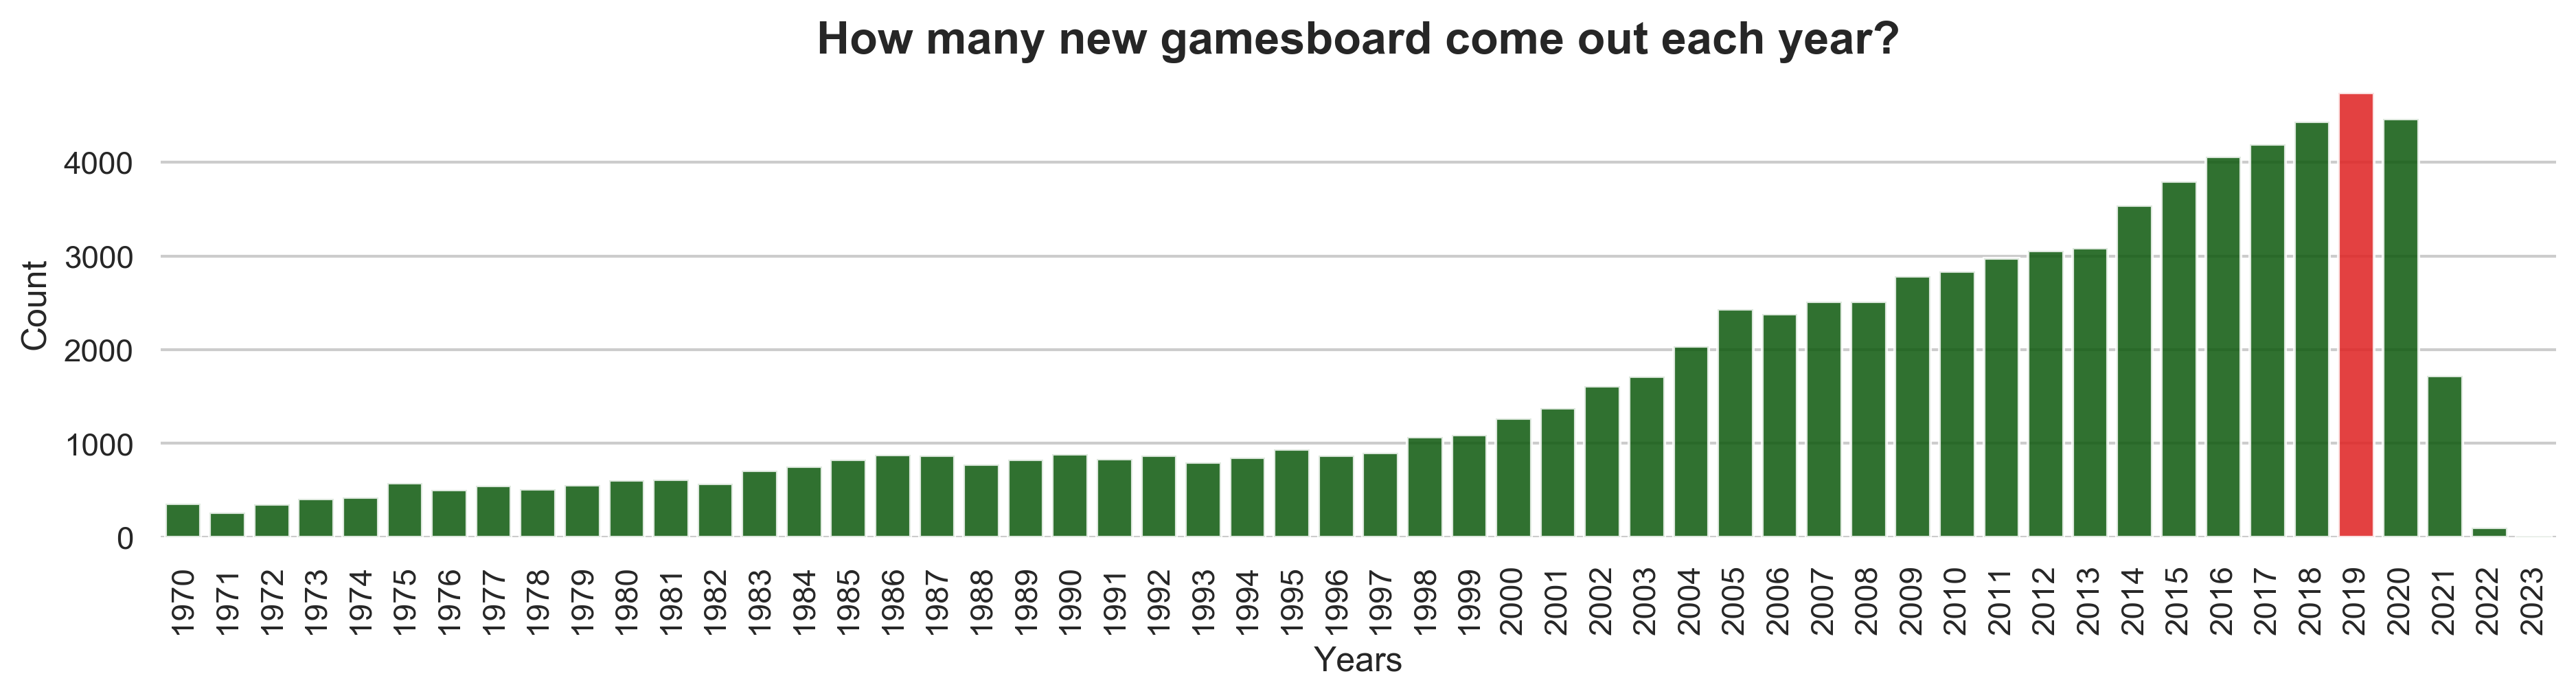

In [33]:
yy= list(year_count.values())
xy= list(year_count.keys())

fig = plt.figure(figsize=(15,3), dpi=300)
ax = fig.gca()

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale = 1, rc={'axes.titlesize': 15})
values = np.array(yy) 
clrs = ['darkgreen' if (x < max(values)) else 'red' for x in values ]
bar=sns.barplot(x=xy, y=yy, ax=ax, palette=clrs, alpha = 0.85)
sns.despine(left=True, bottom=True)

plt.setp(bar.get_xticklabels(), rotation=90) 
bar.set_title('How many new gamesboard come out each year?',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
bar.set_xlabel('Years',fontsize = 12, )
bar.set_ylabel('Count',fontsize = 12 )
plt.show();

<a id="udu"></a>

## 4. Board Games Data Understanding

<a id="uld"></a>

- ### Load Data

In [13]:
#act_dir= os.getcwd()
%cd /users/postigo/Google Drive/BoardGamesData/users

/Users/postigo/Google Drive/BoardGamesData/users


In [14]:
# Obtain the number of users in the file
!ls | wc -l

    2853


In [15]:
# Obtain the number of records in each file
!ls | xargs wc -l > countfile.txt

In [16]:
# Read .txt data
df_countfile= pd.read_csv("countfile.txt", sep=" ", header= None, usecols=[5,6], names=['files', 'namefile'], error_bad_lines=False)
df_countfile.head()

,files,namefile
0,545,0.csv
1,489,1.csv
2,NaN,47
3,552,100.csv
4,109,1000.csv


In [17]:
# Open a user file and view the information it contains
path= "/Users/postigo/Documents/20200917_Repaso/users2"

user237= pd.read_csv("237.csv")
user237

,Unnamed: 0,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
0,0,Magic: The Gathering,182,158,7.5,10.0,32365,100.0%
1,1,Codenames,68,93,7.6,10.0,67424,99.9%
2,2,Mottainai,47,937,7.0,10.0,3486,99.9%
3,3,Innovation,44,334,7.2,10.0,14811,99.9%
4,4,Hansa Teutonica,40,139,7.6,10.0,11425,99.9%
...,...,...,...,...,...,...,...,...
212,212,Age of Steam Expansion: Germany & France,0,-1,7.9,-1.0,89,0.0%
213,213,7 Wonders Duel: Pantheon,0,-1,8.0,-1.0,8984,0.0%
214,214,1859,0,-1,6.9,8.0,25,0.0%
215,215,1844/1854,0,-1,8.0,-1.0,359,0.0%


In [18]:
user237.columns

Index(['Unnamed: 0', 'Game', 'Plays', 'BGG Rank', 'BGG Rating', 'Your Rating',
       'Users Rating', 'Utilisation'],
      dtype='object')

In [19]:
user237.shape

(217, 8)

<a id="udw"></a>

- ### Data Wrangling

#### Create a dataframe with all users and all records

In [20]:
# Merging files into a single csv

path = "/users/postigo/Google Drive/BoardGamesData/users"

all_files= glob.glob(os.path.join(path, "*.csv"))

all_df=[]
for f in all_files:
    df=pd.read_csv(f, sep=',')
    df['file'] = f.split('/')[-1]
    all_df.append(df)
    
users= pd.concat(all_df, ignore_index= True, sort=False)
users

,Unnamed: 0,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,file,Rating,Last Played,Days Since Last Play,0,1,2,3,4,5,6
0,0,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%,545.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260891,202,Babuschka,0.0,16582.0,5.5,-1.0,50.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260892,203,Automobile,0.0,459.0,7.3,8.0,5365.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260893,204,Auf Achse,0.0,3149.0,6.2,6.0,1634.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1260894,205,Alhambra: The Vizier's Favor,0.0,-1.0,6.9,-1.0,1496.0,0.0%,1976.csv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
users.columns

Index(['Unnamed: 0', 'Game', 'Plays', 'BGG Rank', 'BGG Rating', 'Your Rating',
       'Users Rating', 'Utilisation', 'file', 'Rating', 'Last Played',
       'Days Since Last Play', '0', '1', '2', '3', '4', '5', '6'],
      dtype='object')

In [22]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260896 entries, 0 to 1260895
Data columns (total 19 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1260896 non-null  int64  
 1   Game                  1260895 non-null  object 
 2   Plays                 1260875 non-null  float64
 3   BGG Rank              1260875 non-null  float64
 4   BGG Rating            1260875 non-null  float64
 5   Your Rating           1260875 non-null  float64
 6   Users Rating          1260875 non-null  float64
 7   Utilisation           1260875 non-null  object 
 8   file                  1260896 non-null  object 
 9   Rating                20 non-null       float64
 10  Last Played           0 non-null        float64
 11  Days Since Last Play  20 non-null       float64
 12  0                     1 non-null        object 
 13  1                     1 non-null        object 
 14  2                     1 non-null  

<a id="udc"></a>

- ### Data Cleaning

##### Remove columns with most null records

In [23]:
users.drop(columns=['Unnamed: 0','Rating','Last Played','Days Since Last Play',
                       '0', '1','2','3','4','5','6'], axis=1,
              inplace=True)

In [24]:
users.head()

,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,file
0,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%,545.csv
1,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%,545.csv
2,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%,545.csv
3,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%,545.csv
4,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%,545.csv


##### Set the name of the file as user id

In [25]:
file= users['file'].str.split('.', n=1, expand= True)
users.insert(0, 'u_id', file[0])
users.drop(columns =['file'], inplace= True)

In [26]:
users.head()

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
0,545,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%
1,545,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%
2,545,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%
3,545,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%
4,545,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%


In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260896 entries, 0 to 1260895
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   u_id          1260896 non-null  object 
 1   Game          1260895 non-null  object 
 2   Plays         1260875 non-null  float64
 3   BGG Rank      1260875 non-null  float64
 4   BGG Rating    1260875 non-null  float64
 5   Your Rating   1260875 non-null  float64
 6   Users Rating  1260875 non-null  float64
 7   Utilisation   1260875 non-null  object 
dtypes: float64(5), object(3)
memory usage: 77.0+ MB


#### *u_id* column

In [28]:
#Change the data type

users['u_id']=users['u_id'].astype(int)

In [29]:
users['u_id'].max()

2851

In [30]:
# Check if u_id=0 exists

users[users['u_id']==0]

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
186645,0,Telestrations,26.0,258.0,7.4,7.5,12793.0,99.7%
186646,0,My City,21.0,770.0,7.9,8.0,1578.0,99.2%
186647,0,No Thanks!,16.0,449.0,7.1,8.5,20289.0,97.4%
186648,0,Pandemic Legacy: Season 1,12.0,2.0,8.6,8.5,41490.0,93.6%
186649,0,Escape: The Curse of the Temple,12.0,544.0,7.0,8.0,15459.0,93.6%
...,...,...,...,...,...,...,...,...
187184,0,2 de Mayo,0.0,1468.0,6.9,6.5,1900.0,0.0%
187185,0,1830: Railways & Robber Barons,0.0,196.0,7.9,-1.0,4680.0,0.0%
187186,0,Zooloretto,0.0,755.0,6.8,7.5,13881.0,0.0%
187187,0,Zooloretto: Christmas Tree,0.0,-1.0,6.6,-1.0,97.0,0.0%


In [31]:
users['u_id']=users['u_id']+1

In [32]:
users['u_id'].max()

2852

#### Who is the user with the highest number of board games?

In [33]:
user_num=list(users['u_id'])
user_count=users.groupby('u_id')['Game'].count()
print(user_count)

u_id
1       544
2       488
3       199
4       196
5       239
       ... 
2848    239
2849    305
2850    249
2851     41
2852    406
Name: Game, Length: 2852, dtype: int64


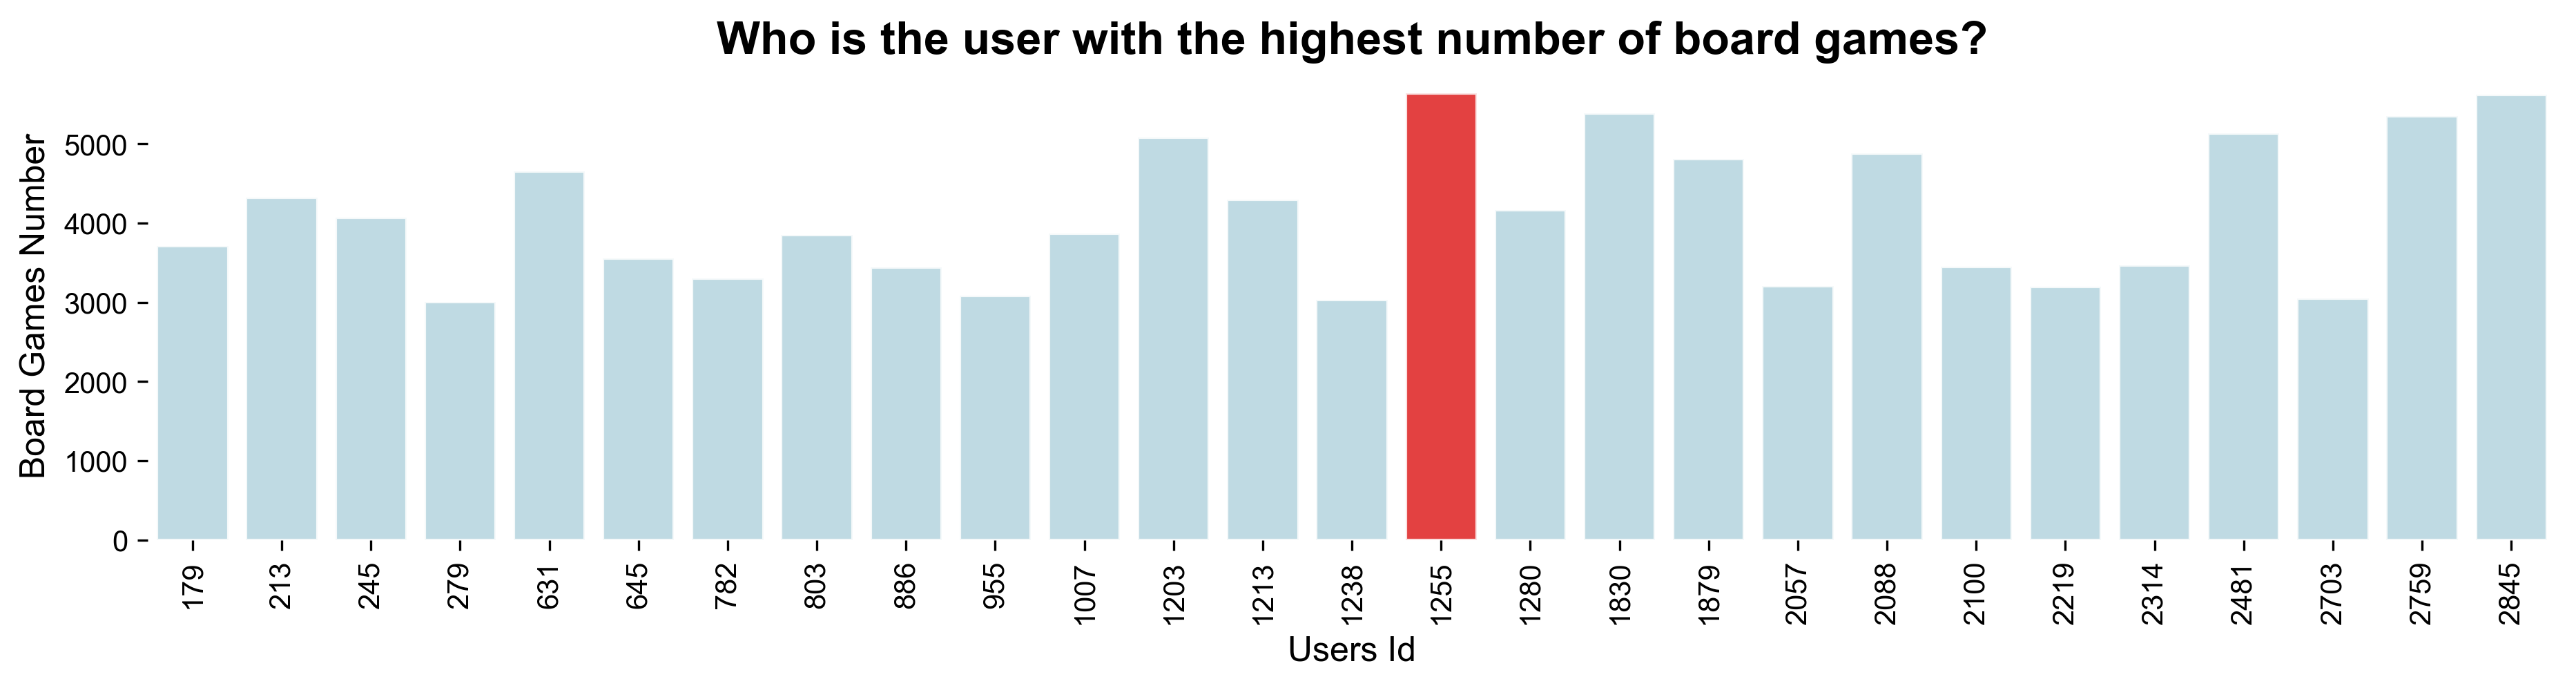

In [34]:
yy= list(user_count[user_count > 3000])
xy= list(user_count[user_count > 3000].index.values)

fig = plt.figure(figsize=(15,3), dpi=300)
ax = fig.gca()

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale = 1, rc={'axes.titlesize': 15})
values = np.array(yy) 
clrs = ['lightblue' if (x < max(values)) else 'red' for x in values ]
bar=sns.barplot(x=xy, y=yy, ax=ax, palette=clrs, alpha = 0.85)
sns.despine(left=True, bottom=True)

plt.setp(bar.get_xticklabels(), rotation=90) 
bar.set_title('Who is the user with the highest number of board games?',fontdict= { 'fontsize': 16, 'fontweight':'bold'})
bar.set_xlabel('Users Id',fontsize = 12, )
bar.set_ylabel('Board Games Number',fontsize = 12 )
plt.show();

#### Check for null values

In [35]:
users.isnull().sum()

u_id             0
Game             1
Plays           21
BGG Rank        21
BGG Rating      21
Your Rating     21
Users Rating    21
Utilisation     21
dtype: int64

In [36]:
users[users['Plays'].isnull()]

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation
653918,2774,Creepers,NaN,NaN,NaN,NaN,NaN,NaN
653919,2774,Crokinole,NaN,NaN,NaN,NaN,NaN,NaN
653920,2774,Machi Koro,NaN,NaN,NaN,NaN,NaN,NaN
653921,2774,Yomi,NaN,NaN,NaN,NaN,NaN,NaN
653922,2774,ZÈRTZ,NaN,NaN,NaN,NaN,NaN,NaN
653923,2774,Kingsburg,NaN,NaN,NaN,NaN,NaN,NaN
653924,2774,Keltis: Das Orakel,NaN,NaN,NaN,NaN,NaN,NaN
653925,2774,Mystic Vale,NaN,NaN,NaN,NaN,NaN,NaN
653926,2774,Hive,NaN,NaN,NaN,NaN,NaN,NaN
653927,2774,Tao Long: The Way of the Dragon,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
# Remove null values

users.dropna(axis=0, inplace=True)

In [38]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1260875 entries, 0 to 1260895
Data columns (total 8 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   u_id          1260875 non-null  int64  
 1   Game          1260875 non-null  object 
 2   Plays         1260875 non-null  float64
 3   BGG Rank      1260875 non-null  float64
 4   BGG Rating    1260875 non-null  float64
 5   Your Rating   1260875 non-null  float64
 6   Users Rating  1260875 non-null  float64
 7   Utilisation   1260875 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 86.6+ MB


#### Review outliers

In [39]:
users.describe()

,u_id,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating
count,1.260875e+06,1.260875e+06,1.260875e+06,1.260875e+06,1.260875e+06,1.260875e+06
mean,1.404150e+03,2.857805e+00,2.462062e+03,7.042334e+00,2.701321e+00,5.761924e+03
std,8.142236e+02,2.254360e+01,4.513049e+03,8.895329e-01,4.191426e+00,1.233732e+04
min,1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00,-1.000000e+00,0.000000e+00
25%,6.980000e+02,0.000000e+00,-1.000000e+00,6.600000e+00,-1.000000e+00,2.140000e+02
50%,1.375000e+03,0.000000e+00,4.350000e+02,7.100000e+00,-1.000000e+00,1.077000e+03
75%,2.088000e+03,2.000000e+00,2.523000e+03,7.600000e+00,7.000000e+00,4.949000e+03
max,2.852000e+03,6.741000e+03,2.028500e+04,1.000000e+01,1.000000e+01,1.018650e+05


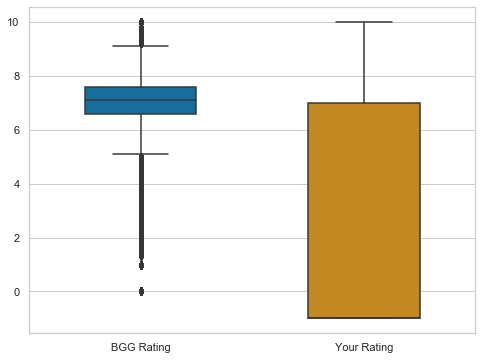

In [40]:
outl=users[['BGG Rating', 'Your Rating']]

# make boxplot with Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(data=outl, width=0.5,palette="colorblind");

In [41]:
print((users['Your Rating']>=0).sum())
print((users['Your Rating']<0).sum())

567662
693213


Within the user dataframe for the columns *'BGG Rank'*, *'BGG Rating'*, *'Your Rating'* there are values of -1. 

**What do these values mean?**

These values correspond to games that have not been rated by users.
If we analyse each of the columns mentioned above we can relate this rating to:

  - For the 'BGG Rank' column, these are games that have not been rated and are not included in the BGG Rank of games.

  - For the column 'BGG Rating' these are games that have never been rated by the users of the BGG.

  - For the 'Your Rating' column, these are games that are in the user's collection, i.e. they have been purchased by the user but have not yet been rated (either because they have not yet been played or because they have not been rated).



<a id="den"></a>

## 5. Data Engineering

#### Add the bgg_id in the user df

In [42]:
bg.columns

NameError: name 'bg' is not defined

In [ ]:
users.columns

In [ ]:
result = pd.merge(users, bg[['bgg_id','name']], how='left', left_on=['Game'], right_on=['name'])
result

In [ ]:
print(bg[bg['name']== 'Die Macher'])

In [ ]:
print(users[users['Game']== 'Die Macher'])

In [ ]:
result.isnull().sum()

In [43]:
result2 = pd.merge(users, dfbg[['bgg_id','name']], how='left', left_on=['Game'], right_on=['name'])
result2

,u_id,Game,Plays,BGG Rank,BGG Rating,Your Rating,Users Rating,Utilisation,bgg_id,name
0,546,Tichu,51.0,170.0,7.6,10.0,13267.0,99.9%,215.0,Tichu
1,546,Admin Test Item,47.0,-1.0,7.5,3.0,25.0,99.9%,41047.0,Admin Test Item
2,546,Magic: The Gathering,18.0,158.0,7.5,10.0,32365.0,98.4%,463.0,Magic: The Gathering
3,546,Agricola,16.0,31.0,7.9,10.0,63367.0,97.4%,31260.0,Agricola
4,546,Ticket to Ride,15.0,174.0,7.4,10.0,71408.0,96.8%,9209.0,Ticket to Ride
...,...,...,...,...,...,...,...,...,...,...
1400323,1977,Babuschka,0.0,16582.0,5.5,-1.0,50.0,0.0%,1226.0,Babuschka
1400324,1977,Automobile,0.0,459.0,7.3,8.0,5365.0,0.0%,39351.0,Automobile
1400325,1977,Auf Achse,0.0,3149.0,6.2,6.0,1634.0,0.0%,110.0,Auf Achse
1400326,1977,Alhambra: The Vizier's Favor,0.0,-1.0,6.9,-1.0,1496.0,0.0%,NaN,NaN


In [44]:
result2.isnull().sum()

u_id                 0
Game                 0
Plays                0
BGG Rank             0
BGG Rating           0
Your Rating          0
Users Rating         0
Utilisation          0
bgg_id          389279
name            389279
dtype: int64

In [46]:
r.to_csv('bgg_null.csv')